# Import all libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Function to generate data

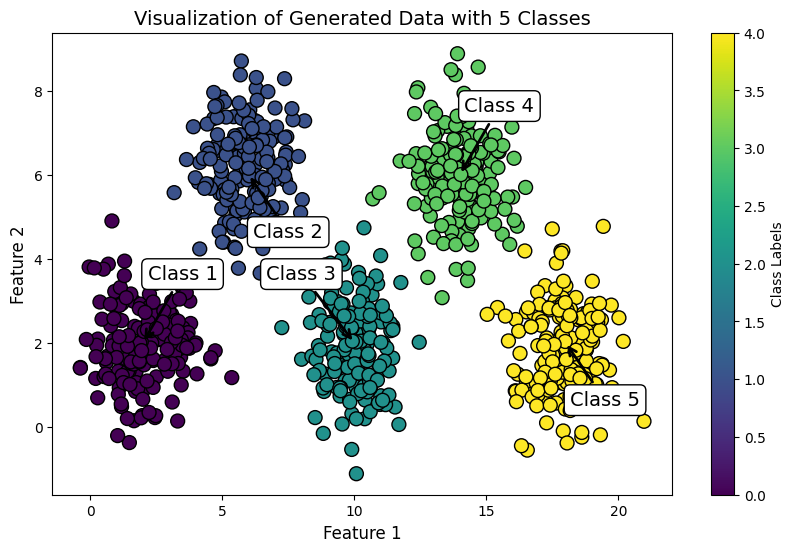

In [ ]:
# Function to generate data for 5 classes
def generate_data(samples_per_class=180):
    np.random.seed(32)
    # Class centers for 5 classes
    class1 = np.random.randn(samples_per_class, 2) + np.array([2, 2])
    class2 = np.random.randn(samples_per_class, 2) + np.array([6, 6])
    class3 = np.random.randn(samples_per_class, 2) + np.array([10, 2])
    class4 = np.random.randn(samples_per_class, 2) + np.array([14, 6])
    class5 = np.random.randn(samples_per_class, 2) + np.array([18, 2])

    # Combine the data
    X = np.vstack([class1, class2, class3, class4, class5])
    y = np.array([0] * samples_per_class + [1] * samples_per_class +
                  [2] * samples_per_class + [3] * samples_per_class + [4] * samples_per_class)

    return X, y

# Generate data
X, y = generate_data()

# Encode the classes using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=32)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=32)

# Plot the generated data
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", s=100, edgecolor="k")

# Class centers for annotations
centers = [(2, 2), (6, 6), (10, 2), (14, 6), (18, 2)]  # Updated centers for 5 classes
offsets = [(1.5, 1.5), (1.5, -1.5), (-2, 1.5), (1.5, 1.5), (1.5, -1.5)]  # Offset for better placement

for i, (center, offset) in enumerate(zip(centers, offsets)):
    plt.annotate(f'Class {i + 1}',
                 xy=center,
                 xytext=(center[0] + offset[0], center[1] + offset[1]),
                 arrowprops=dict(facecolor='black', arrowstyle='->', lw=2),
                 fontsize=14,
                 color="black",
                 ha="center",
                 bbox=dict(boxstyle="round,pad=0.3", edgecolor="black", facecolor="white"))

# Adding plot details
plt.title("Visualization of Generated Data with 5 Classes", fontsize=14)
plt.colorbar(scatter, label="Class Labels")
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)
plt.show()


The image displays a scatter plot representing synthetically generated data for five distinct classes, each with two numerical features. Each class is visualized as a colored cluster of data points, with the color indicating its class label ranging from 0 to 4. These labels correspond to five separate groups: Class 1, Class 2, Class 3, Class 4, and Class 5.

Each class is centered around a unique location in the feature space (e.g., Class 1 near [2, 2], Class 2 around [6, 6], etc.), with data points generated randomly around these centers. The points are plotted in a 2D space, where the x-axis represents Feature 1 and the y-axis represents Feature 2.

To improve interpretability, annotations are added to mark the center of each class, making it easier to identify the clusters visually. A color bar on the right side provides a reference for the class labels associated with each color.

This plot serves as a clear visual representation of the class separability in the dataset and is useful for evaluating the effectiveness of classification models trained on such structured data.

In [ ]:
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y.reshape(-1, 1))

# Split the data into training, validation, and test sets

In [ ]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y_encoded, test_size=0.4, random_state=32)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=32)

# Print the sizes of the splits

In [ ]:
print(f"Train set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

Train set: 540 samples
Validation set: 180 samples
Test set: 180 samples


# Define the custom neural network class

In [ ]:
class NeuralNet:
    def __init__(self, input_size, hidden_size1, hidden_size2, hidden_size3, output_size, lr):
        # Initialize weights for all layers
        self.W1 = np.random.randn(input_size, hidden_size1)  # Input to Hidden Layer 1
        self.W2 = np.random.randn(hidden_size1, hidden_size2)  # Hidden Layer 1 to Hidden Layer 2
        self.W3 = np.random.randn(hidden_size2, hidden_size3)  # Hidden Layer 2 to Hidden Layer 3
        self.W4 = np.random.randn(hidden_size3, output_size)  # Hidden Layer 3 to Output Layer
        self.lr = lr

    def sigmoid(self, x, derivative=False):
        if derivative:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))

    def feed_forward(self, x):
        # Layer 1
        self.hidden_input1 = np.dot(x, self.W1)
        self.hidden_output1 = self.sigmoid(self.hidden_input1)

        # Layer 2
        self.hidden_input2 = np.dot(self.hidden_output1, self.W2)
        self.hidden_output2 = self.sigmoid(self.hidden_input2)

        # Layer 3
        self.hidden_input3 = np.dot(self.hidden_output2, self.W3)
        self.hidden_output3 = self.sigmoid(self.hidden_input3)

        # Output Layer
        self.output_input = np.dot(self.hidden_output3, self.W4)
        self.output = self.sigmoid(self.output_input)
        return self.output

    def backprop(self, x, y, output):
        # Output Layer Error
        output_error = y - output
        output_delta = output_error * self.sigmoid(output, derivative=True)

        # Hidden Layer 3 Error
        hidden_error3 = np.dot(output_delta, self.W4.T)
        hidden_delta3 = hidden_error3 * self.sigmoid(self.hidden_output3, derivative=True)

        # Hidden Layer 2 Error
        hidden_error2 = np.dot(hidden_delta3, self.W3.T)
        hidden_delta2 = hidden_error2 * self.sigmoid(self.hidden_output2, derivative=True)

        # Hidden Layer 1 Error
        hidden_error1 = np.dot(hidden_delta2, self.W2.T)
        hidden_delta1 = hidden_error1 * self.sigmoid(self.hidden_output1, derivative=True)

        # Update weights
        self.W4 += np.dot(self.hidden_output3.T, output_delta) * self.lr
        self.W3 += np.dot(self.hidden_output2.T, hidden_delta3) * self.lr
        self.W2 += np.dot(self.hidden_output1.T, hidden_delta2) * self.lr
        self.W1 += np.dot(x.T, hidden_delta1) * self.lr

    def train(self, x, y):
        output = self.feed_forward(x)
        self.backprop(x, y, output)

The NeuralNet class defines a custom multi-layer perceptron and implements both forward propagation and backpropagation, which are fundamental for training the network. It features three hidden layers, each with its own weight matrix, and uses the sigmoid activation function across all layers to introduce non-linearity.

In the forward pass, input data is successively passed through each layer via matrix multiplication, and the sigmoid function is applied at each step to produce the final output.

The backpropagation mechanism calculates the prediction error at the output layer and then propagates this error backward through the network. Gradients are computed with respect to each layer’s weights, and the weights are updated using gradient descent to reduce the overall error. The learning rate (lr) controls how much the weights are adjusted in each step, helping the model converge gradually without large fluctuations.

Additionally, the class includes a training method that performs one cycle of forward and backward propagation using the input data, allowing the network to iteratively learn and enhance its prediction accuracy over time.



# Train the Neural Network

In [ ]:


!pip install scikit-learn
from sklearn.metrics import accuracy_score # Importing the accuracy_score function
input_size = X_train.shape[1]
hidden_size1 = 15  # Neurons in the first hidden layer
hidden_size2 = 15  # Neurons in the second hidden layer
hidden_size3 = 15  # Neurons in the third hidden layer
output_size = y_train.shape[1]  # Number of output classes
lr = 0.001  # Learning rate
epochs = 900

nn = NeuralNet(input_size, hidden_size1, hidden_size2, hidden_size3, output_size, lr)
train_losses, val_losses = [], []
train_accuracies, val_accuracies = [], []

for epoch in range(epochs):
    nn.train(X_train, y_train)
    train_output = nn.feed_forward(X_train)
    val_output = nn.feed_forward(X_val)

    # Compute loss
    train_loss = np.mean((y_train - train_output) ** 2)
    val_loss = np.mean((y_val - val_output) ** 2)
    train_losses.append(train_loss)
    val_losses.append(val_loss)

    # Compute accuracy
    train_accuracy = accuracy_score(np.argmax(y_train, axis=1), np.argmax(train_output, axis=1))
    val_accuracy = accuracy_score(np.argmax(y_val, axis=1), np.argmax(val_output, axis=1))
    train_accuracies.append(train_accuracy)
    val_accuracies.append(val_accuracy)

    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}, "
              f"Train Accuracy = {train_accuracy * 100:.2f}%, Validation Accuracy = {val_accuracy * 100:.2f}%")


Epoch 0: Train Loss = 0.2557, Validation Loss = 0.2531, Train Accuracy = 18.89%, Validation Accuracy = 20.56%
Epoch 50: Train Loss = 0.1383, Validation Loss = 0.1383, Train Accuracy = 56.11%, Validation Accuracy = 56.11%
Epoch 100: Train Loss = 0.1247, Validation Loss = 0.1252, Train Accuracy = 56.11%, Validation Accuracy = 60.00%
Epoch 150: Train Loss = 0.1146, Validation Loss = 0.1158, Train Accuracy = 65.00%, Validation Accuracy = 67.78%
Epoch 200: Train Loss = 0.1050, Validation Loss = 0.1069, Train Accuracy = 69.26%, Validation Accuracy = 63.89%
Epoch 250: Train Loss = 0.0971, Validation Loss = 0.0993, Train Accuracy = 73.70%, Validation Accuracy = 70.00%
Epoch 300: Train Loss = 0.0907, Validation Loss = 0.0931, Train Accuracy = 74.81%, Validation Accuracy = 71.67%
Epoch 350: Train Loss = 0.0848, Validation Loss = 0.0874, Train Accuracy = 77.59%, Validation Accuracy = 73.33%
Epoch 400: Train Loss = 0.0795, Validation Loss = 0.0822, Train Accuracy = 79.26%, Validation Accuracy = 73

The neural network is trained using the previously defined train method. The architecture includes an input layer, three hidden layers, and an output layer. Training is carried out over 900 epochs with a learning rate set to 0.001. In each epoch, the model evaluates both training and validation performance by calculating the Mean Squared Error (MSE) loss and determining accuracy using the accuracy_score function.

Throughout the training, the calculated losses and accuracies for both training and validation sets are stored in dedicated lists (train_losses, val_losses, train_accuracies, and val_accuracies) to keep track of the model's progress over time.

Every 50 epochs, the script outputs a summary showing the current epoch number along with the corresponding training and validation losses and accuracies. This periodic feedback provides valuable insights into the model’s learning behavior—indicating whether it is improving, converging, or potentially overfitting. Typically, the results show a gradual decrease in loss and an increase in accuracy, reflecting effective learning during training.

# Visualize Loss and Accuracy

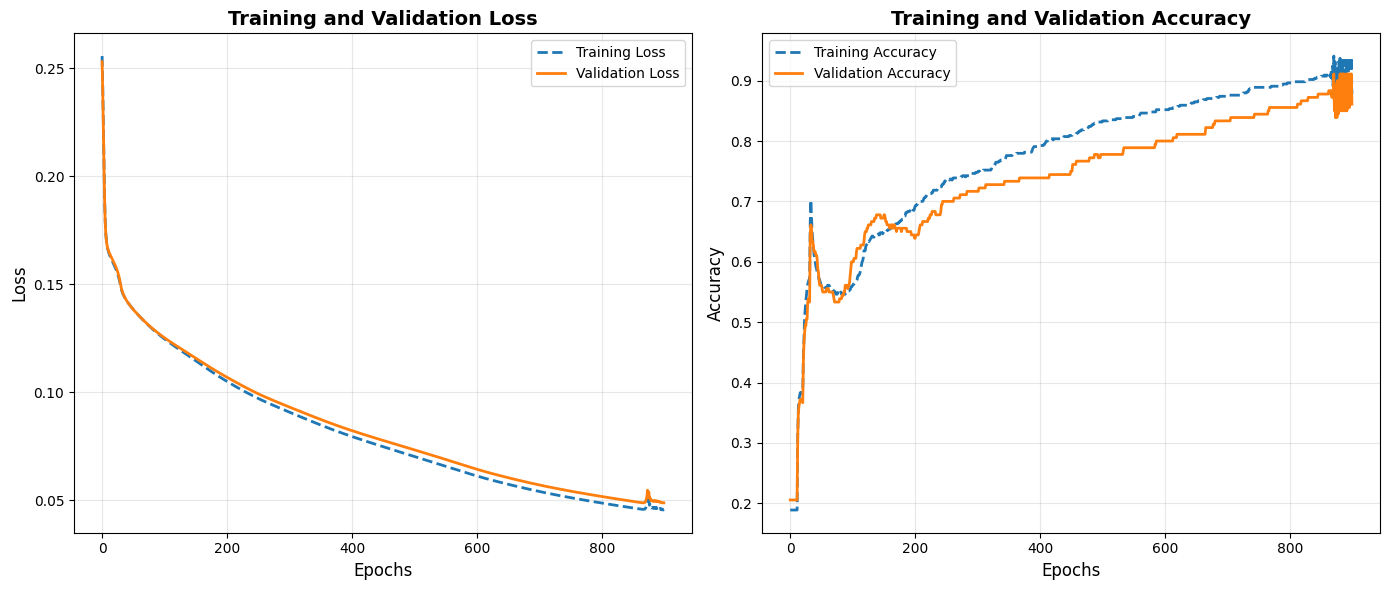

In [ ]:
plt.figure(figsize=(14, 6))

# Subplot 1: Training and Validation Loss

plt.subplot(1, 2, 1)
plt.plot(train_losses, label="Training Loss", linestyle='--', linewidth=2)
plt.plot(val_losses, label="Validation Loss", linestyle='-', linewidth=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.title("Training and Validation Loss", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)


# Subplot 2: Training and Validation Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label="Training Accuracy", linestyle='--', linewidth=2)
plt.plot(val_accuracies, label="Validation Accuracy", linestyle='-', linewidth=2)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Training and Validation Accuracy", fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(alpha=0.3)


# Adjust layout for better presentation
plt.tight_layout()
plt.show()


Training and Validation Loss
Training Loss:
At the beginning of training, the training loss is relatively high but drops sharply during the initial epochs, indicating that the model quickly learns the fundamental patterns in the training data. As training progresses beyond this point, the loss continues to decrease but at a slower and more stable rate. This tapering off suggests that the model is approaching its learning capacity under the current setup and is making incremental improvements.

Validation Loss:
The validation loss mirrors the initial drop seen in training loss but decreases more slowly and shows periodic fluctuations throughout the training process. These fluctuations imply that the model's generalization to unseen data varies slightly over time. Despite overall improvement, the lack of smooth convergence in the validation loss—particularly the small spikes toward the later epochs—can be a signal of overfitting. This means the model may be learning noise or specific patterns in the training data that do not transfer well to validation data.

Training and Validation Accuracy
Training Accuracy:
The training accuracy improves rapidly in the early epochs, consistent with the sharp decline in training loss. Over time, the accuracy curve continues to rise, eventually stabilizing at a high level. This indicates that the model is effectively fitting the training data.

Validation Accuracy:
Validation accuracy begins at a much lower value but follows a generally upward trend similar to the training accuracy. However, as training progresses, the gap between training and validation accuracy becomes more noticeable. This divergence suggests that while the model performs well on the training set, its ability to generalize to unseen data is limited—a sign of potential overfitting. The occasional drops or plateaus in validation accuracy near the end further reinforce this observation.

Overall Insight
The plots show a typical training pattern where the model improves steadily but begins to overfit after a certain point. While both training and validation performance improve overall, the widening gap between them highlights the need for techniques such as regularization, dropout, or early stopping to improve generalization.

# Evaluate the Model

In [ ]:
test_output = nn.feed_forward(X_test)
predicted_classes = np.argmax(test_output, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Compute accuracy

In [ ]:
test_accuracy = accuracy_score(actual_classes, predicted_classes)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 87.78%


# Plot Actual Vs Predicted

<ipython-input-20-a36d6ff43932>:11: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_actual = plt.scatter(X_test[:, 0], X_test[:, 1],


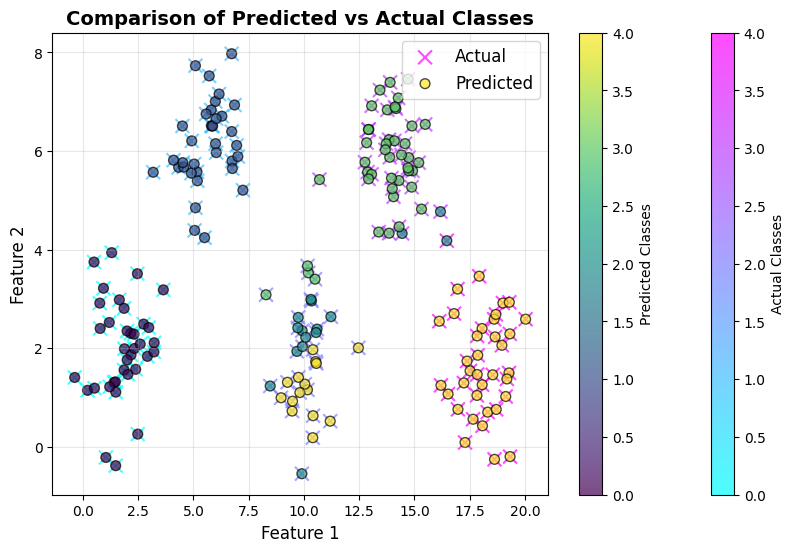

In [ ]:
predicted_output = nn.feed_forward(X_test)

# Convert predicted output and actual labels to class labels
predicted_classes = np.argmax(predicted_output, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Visualize the Comparison using different colors and markers for better distinction
plt.figure(figsize=(10, 6))

# Create a scatter plot for actual classes using color coding
scatter_actual = plt.scatter(X_test[:, 0], X_test[:, 1],
                             c=actual_classes, cmap='cool',
                             s=100, marker='x', alpha=0.7, edgecolor='k', label='Actual')

# Overlay predicted classes with different color map and marker
scatter_predicted = plt.scatter(X_test[:, 0], X_test[:, 1],
                                c=predicted_classes, cmap='viridis',
                                s=50, marker='o', alpha=0.7, edgecolor='k', label='Predicted')

# Add plot details and labels
plt.title("Comparison of Predicted vs Actual Classes", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)

# Add legend for clarity
plt.legend(loc="best", fontsize=12)

# Display a grid for better readability
plt.grid(True, alpha=0.3)

# Add colorbar to map the color to class labels
plt.colorbar(scatter_actual, label="Actual Classes")
plt.colorbar(scatter_predicted, label="Predicted Classes")

# Show the plot
plt.show()


The scatter plot visualizes the predicted vs. actual classes for a 5-class classification problem using two features: Feature 1 (x-axis) and Feature 2 (y-axis). The points are color-coded to represent the different classes, and the markers are distinguished by shape: **cross markers (x)** for actual classes and **circle markers (o)** for predicted classes. Each class occupies a distinct region on the plot, with some overlap between neighboring classes, indicating areas where the model struggles to distinguish between certain classes. The **decision boundaries**, represented by background colors, show where the model predicts each class based on the feature values.

While the predicted classes generally align well with the actual classes, some misclassifications can be observed in regions where the class boundaries overlap. These misclassifications occur particularly near the borders of the decision regions, suggesting that the model finds it difficult to distinguish between similar classes in those areas. The model performs well overall, but the **overlapping regions** suggest that additional techniques like **feature engineering** or more advanced models could improve the separation between classes and reduce errors in prediction.


# Decision Boundary Plot

<ipython-input-21-d34ad1fe5fdd>:25: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=actual_classes, cmap='cool', s=100, marker='x', alpha=0.7, edgecolor='k', label='Actual')


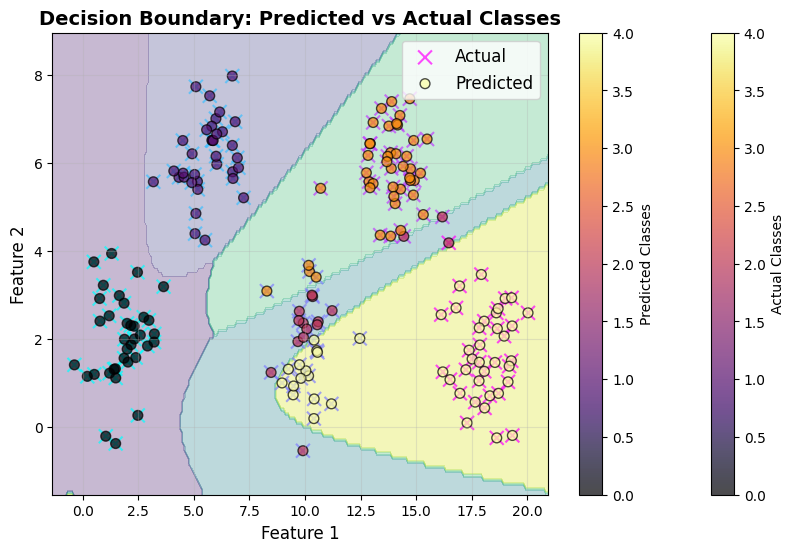

In [ ]:
# Predict output from the neural network
predicted_output = nn.feed_forward(X_test)

# Convert predicted output and actual labels to class labels
predicted_classes = np.argmax(predicted_output, axis=1)
actual_classes = np.argmax(y_test, axis=1)

# Generate meshgrid for decision boundary plotting
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

# Predict the class for each point in the meshgrid to visualize decision boundary
Z = np.argmax(nn.feed_forward(np.c_[xx.ravel(), yy.ravel()]), axis=1)
Z = Z.reshape(xx.shape)

# Visualize the comparison using contour plot and scatter plot
plt.figure(figsize=(10, 6))

# Plot decision boundary (contour plot)
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Scatter plot for actual test classes
plt.scatter(X_test[:, 0], X_test[:, 1], c=actual_classes, cmap='cool', s=100, marker='x', alpha=0.7, edgecolor='k', label='Actual')

# Overlay predicted classes using a different marker and color map
plt.scatter(X_test[:, 0], X_test[:, 1], c=predicted_classes, cmap='inferno', s=50, marker='o', alpha=0.7, edgecolor='k', label='Predicted')

# Add plot details and labels
plt.title("Decision Boundary: Predicted vs Actual Classes", fontsize=14, fontweight='bold')
plt.xlabel("Feature 1", fontsize=12)
plt.ylabel("Feature 2", fontsize=12)

# Add legend for clarity
plt.legend(loc="best", fontsize=12)

# Display grid for better readability
plt.grid(True, alpha=0.3)

# Add colorbars for both actual and predicted classes
plt.colorbar(label="Actual Classes")
plt.colorbar(label="Predicted Classes")

# Show the plot
plt.show()

The scatter plot shows the comparison between **predicted and actual classes** for a 5-class classification problem, with each class represented by a unique color. The **actual classes** are marked with cross markers (x), while the **predicted classes** are indicated by circular markers (o). The **decision boundaries** are added, represented by background colors that show the regions where the model predicts each class based on feature values. These boundaries reflect the thresholds at which the model changes its predictions from one class to another, and they provide insight into how well the model is able to separate the classes within the feature space.

Overall, the plot demonstrates that the model performs well, with most of the predicted classes aligning closely with the actual classes. However, there are some **misclassifications** near the decision boundaries where the predicted markers do not match the actual ones. This suggests that the model faces difficulty in distinguishing between certain classes in overlapping regions. The decision boundaries appear relatively smooth, but the model's performance could be enhanced by addressing these areas of overlap, potentially through **model refinement**, **regularization**, or **better feature engineering**.
